In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Admin\AppData\Local\Temp\ipykernel_10988\328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
X 

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [14]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, random_state=42, cluster_std=0.4)

# Standardize the features (important for DBSCAN)
X = StandardScaler().fit_transform(X)

# DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=20)
labels = db.fit_predict(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) 
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 54


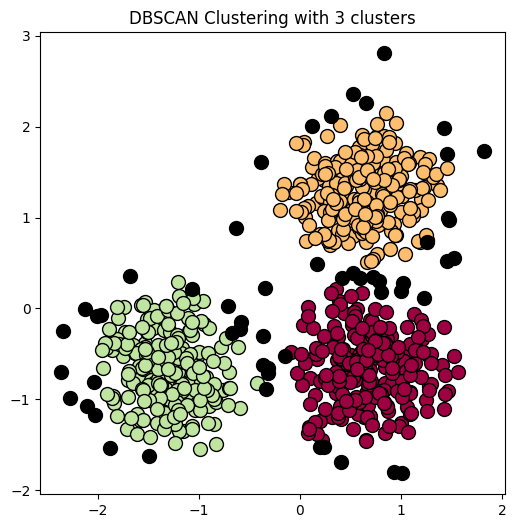

In [8]:


# Plotting the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(6, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0,1]

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

plt.title(f'DBSCAN Clustering with {n_clusters_} clusters')
plt.show()




In [9]:
homogeneity_score = metrics.homogeneity_score(labels_true,labels)
print("Homogeneity: %0.3f"%homogeneity_score)

completeness_score = metrics.completeness_score(labels_true,labels)
print("Completeness: %0.3f"%completeness_score)

v_measure_score = metrics.v_measure_score(labels_true,labels)
print("V_measure: %0.3f"%v_measure_score)

adjusted_rand_score = metrics.adjusted_rand_score(labels_true,labels)
print("Adjusted Rand Index: %0.3f"%adjusted_rand_score)

adjusted_mutual_info_score = metrics.adjusted_mutual_info_score(labels_true,labels)
print("Adjusted Mutual Information: %0.3f"%adjusted_mutual_info_score)

silhouette_score = metrics.silhouette_score(X, labels, metric='sqeuclidean')


Homogeneity: 0.928
Completeness: 0.798
V_measure: 0.858
Adjusted Rand Index: 0.888
Adjusted Mutual Information: 0.858


In [10]:
supervised=dataset

In [11]:
labels = labels[:len(supervised)]  # Trim 'labels' to match the length of the DataFrame
supervised['Cluster_Group'] = labels

In [12]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


In [13]:
supervised.to_csv("cluster.csv",index=False)


In [14]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


In [15]:
dir(db)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'algorithm',
 'components_',
 'core_sample_indices_',
 'eps',
 'fit',
 'fit_predict',
 'get_metadata_routing',
 'get_params',
 'l

In [16]:
labels

array([ 0,  1,  2, -1,  1,  1,  2,  0,  2,  2,  0,  1,  0,  1,  2,  1,  2,
        1,  0,  1,  0,  1,  1,  0,  1,  1,  2,  2,  2,  2,  1,  0, -1,  1,
        2,  1,  1,  2, -1,  1,  1,  1, -1,  0,  0,  2,  1,  0,  1,  1,  0,
        2,  1,  2,  2,  1,  1,  1,  2,  1,  0,  2,  0,  0,  2,  1,  0,  0,
        1,  0,  2,  1,  0,  2,  0,  1,  0,  2,  0,  2,  1,  1,  2,  1,  1,
        0,  1,  0,  2,  1,  1,  0,  2,  0, -1,  1,  2,  2,  1,  0,  0,  1,
        2,  2,  0,  2,  2,  1,  2,  2,  0,  1,  2,  1,  2,  2,  1,  2,  0,
        2,  1,  2,  0,  1,  0,  2,  2,  1,  2,  0,  2,  2,  2,  1,  1,  1,
        0,  1,  0,  2,  0,  1,  0,  1, -1,  2,  1,  1,  1,  2,  2,  2,  1,
        0,  1,  0,  0,  0,  0,  2,  0,  1,  0,  0,  2,  2,  1,  2,  1,  1,
        1, -1,  1,  2,  1,  2,  1,  1,  0,  1,  2,  2,  1,  2,  1,  2,  2,
        1,  1,  1,  2,  0,  1,  0,  0,  1,  0,  2,  2,  1], dtype=int64)